# Creating a grid

## The Grid object

In [5]:
from roms_tools import Grid
import os
outputdir = "/home/ctroupin/data/CROCO/"
gridfile = os.path.join(outputdir, "croco_grd_nea_py.nc")

We can create a ROMS grid, mask, topography, and vertical coordinate system by creating an instance of the `Grid` class. In this example our grid spans the Nordic Seas and has a horizontal resolution of 10km and 100 vertical layers.

In [2]:
grid = Grid(
    nx=520,  # number of grid points in x-direction
    ny=450,  # number of grid points in y-direction
    size_x=1560,  # domain size in x-direction (in km)
    size_y=1350,  # domain size in y-direction (in km)
    center_lon=-17.75,  # longitude of the center of the domain
    center_lat=30,  # latitude of the center of the domain
    rot=-15,  # rotation of the grid (in degrees)
    N=40,  # number of vertical layers
    verbose=True,
)

2026-01-08 10:02:40 - INFO - === Creating the horizontal grid ===
2026-01-08 10:02:41 - INFO - Total time: 0.538 seconds
2026-01-08 10:02:41 - INFO - ================================================================================================
2026-01-08 10:02:41 - INFO - === Deriving the mask from coastlines ===
2026-01-08 10:02:42 - INFO - Total time: 1.098 seconds
2026-01-08 10:02:42 - INFO - ================================================================================================
2026-01-08 10:02:42 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2026-01-08 10:02:42 - INFO - Reading the topography data: 0.070 seconds
2026-01-08 10:02:42 - INFO - Regridding the topography: 0.040 seconds
2026-01-08 10:02:42 - INFO - Domain-wide topography smoothing: 0.118 seconds
2026-01-08 10:02:53 - INFO - Local topography smoothing: 10.417 seconds
2026-01-08 10:02:53 - INFO - Total time: 10.662 seconds
2026-01-08 10:02:53 - INFO - ======================

2026-01-08 10:35:51 - INFO - === Creating the horizontal grid ===
2026-01-08 10:35:51 - INFO - Total time: 0.128 seconds
2026-01-08 10:35:51 - INFO - ================================================================================================
2026-01-08 10:35:51 - INFO - === Deriving the mask from coastlines ===
2026-01-08 10:35:52 - INFO - Total time: 0.305 seconds
2026-01-08 10:35:52 - INFO - ================================================================================================
2026-01-08 10:35:52 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2026-01-08 10:35:52 - INFO - Reading the topography data: 0.020 seconds
2026-01-08 10:35:52 - INFO - Regridding the topography: 0.013 seconds
2026-01-08 10:35:52 - INFO - Domain-wide topography smoothing: 0.031 seconds
2026-01-08 10:35:57 - INFO - Local topography smoothing: 4.739 seconds
2026-01-08 10:35:57 - INFO - Total time: 4.819 seconds
2026-01-08 10:35:57 - INFO - ========================

[PosixPath('/home/ctroupin/data/CROCO/croco_grd_nea_py.nc')]

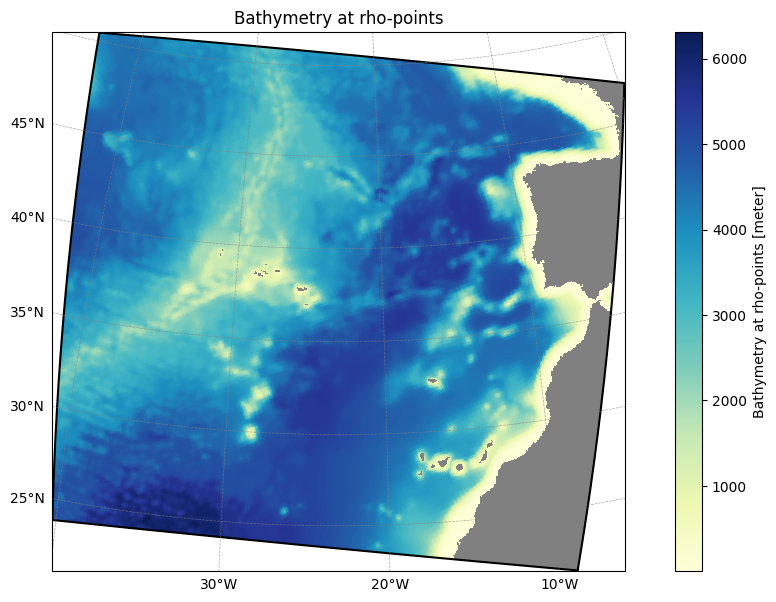

In [7]:
largegrid = Grid(
    nx=442,  # number of grid points in x-direction
    ny=400,  # number of grid points in y-direction
    size_x=3300,  # domain size in x-direction (in km)
    size_y=3000,  # domain size in y-direction (in km)
    center_lon=-23.,  # longitude of the center of the domain
    center_lat=37.2,  # latitude of the center of the domain
    rot=-5.5,  # rotation of the grid (in degrees)
    N=32,  # number of vertical layers
    verbose=True,
)
largegrid.plot()
grid.save(gridfile)

In [15]:
largegrid.ds.lon_rho.data.min(), largegrid.ds.lon_rho.data.max(), largegrid.ds.lat_rho.min().data, largegrid.ds.lat_rho.max().data

(np.float64(0.0045002354578666855),
 np.float64(359.9989014643125),
 array(21.44750357),
 array(50.94519388))

In [12]:
largegrid.ds.lon_rho

<xarray.DataArray 'lon_rho' (eta_rho: 402, xi_rho: 444)> Size: 1MB
array([[3.19787036e+02, 3.19858148e+02, 3.19929269e+02, ...,
        3.50936189e+02, 3.51004235e+02, 3.51072260e+02],
       [3.19780652e+02, 3.19851819e+02, 3.19922995e+02, ...,
        3.50953447e+02, 3.51021539e+02, 3.51089611e+02],
       [3.19774260e+02, 3.19845482e+02, 3.19916713e+02, ...,
        3.50970724e+02, 3.51038863e+02, 3.51106981e+02],
       ...,
       [3.16200868e+02, 3.16302427e+02, 3.16404017e+02, ...,
        2.11923817e-01, 3.02315974e-01, 3.92642598e-01],
       [3.16187739e+02, 3.16289407e+02, 3.16391107e+02, ...,
        2.44166611e-01, 3.34626021e-01, 4.25019675e-01],
       [3.16174577e+02, 3.16276355e+02, 3.16378166e+02, ...,
        2.76475703e-01, 3.67002423e-01, 4.57463163e-01]], shape=(402, 444))
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 1MB 23.81 23.82 23.83 ... 47.17 47.15
    lon_rho  (eta_rho, xi_rho) float64 1MB 319.8 319.9 319.9 ... 0.367 0.4575
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  longitude of rho-points
    units:      degrees East

We generated the grid with verbose mode enabled, allowing us to see which steps were taken and how long each took. As you can see from the printed output, the four main steps are as follows:

I. [Creating the horizontal grid](https://roms-tools.readthedocs.io/en/latest/methods.html#horizontal-grid)

II. [Creating the mask](https://roms-tools.readthedocs.io/en/latest/methods.html#mask)

III. [Generating the topography](https://roms-tools.readthedocs.io/en/latest/methods.html#topography)

IV. [Preparing the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system)

We will explore steps II., III., and IV. in more detail later. For now, let's examine the grid variables that were created, which can be found in the `xarray.Dataset` object returned by the `.ds` property.

### Saving as NetCDF or YAML file

Once we are happy with our grid, we can save it as a netCDF file via the `.save` method:

In [12]:
filepath = "my_roms_grid.nc"

In [20]:
571 + ((704 - 2) / 3)

805.0

We can also export the grid parameters to a YAML file. This gives us a more storage-effective way to save and share input data made with `ROMS-Tools`. The YAML file can be used to recreate the same grid object later.

In [9]:
yaml_filepath = "/pscratch/sd/n/nloose/grids/my_roms_grid.yaml"

In [10]:
grid.to_yaml(yaml_filepath)

These are the contents of the written YAML file.

In [11]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 3.1.2.dev23+gc2b82bc5c
---
Grid:
  nx: 250
  ny: 250
  size_x: 2500
  size_y: 2500
  center_lon: -15
  center_lat: 65
  rot: -30
  N: 100
  theta_s: 5.0
  theta_b: 2.0
  hc: 300.0
  topography_source:
    name: SRTM15
    path: /global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc
  mask_shapefile: null
  hmin: 5.0



### Creating a grid from an existing NetCDF or YAML file

We can also create a grid from an existing file.

In [12]:
the_same_grid = Grid.from_file(filepath)

In [13]:
the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB ...
    lon_rho       (eta_rho, xi_rho) float64 508kB ...
    lat_u         (eta_rho, xi_u) float64 506kB ...
    lon_u         (eta_rho, xi_u) float64 506kB ...
    lat_v         (eta_v, xi_rho) float64 506kB ...
    lon_v         (eta_v, xi_rho) float64 506kB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB ...
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB ...
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB ...
    f             (eta_rho, xi_rho) float64 508kB ...
    pm            (eta_rho, xi_rho) float64 508kB ...
    pn            (eta_rho, xi_rho) float64 508kB ...
    spherical     |S1 1B ...
    mask_rho      (eta_rho, xi_rho) int32 254kB ...
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB ...
    h             (eta_rho, xi_rho) float64 508kB ...
    sigma_r       (s_rho) float32 400B ...
    Cs_r          (s_rho) float32 400B ...
    sigma_w       (s_w) float32 404B ...
    Cs_w          (s_w) float32 404B ...
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.1.2.dev23+gc2b82bc5c
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /global/cfs/projectdirs/m4746/Datasets/SRTM15/SR...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

Alternatively, we can create a grid from an existing YAML file.

In [14]:
%time yet_the_same_grid = Grid.from_yaml(yaml_filepath, verbose=False)

CPU times: user 4.31 s, sys: 424 ms, total: 4.74 s
Wall time: 8.95 s


In [15]:
yet_the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.27 57.26 ... 64.56 64.48
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.61 22.7
    lat_u         (eta_rho, xi_u) float64 506kB 57.27 57.26 57.25 ... 64.6 64.52
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 ... 22.56 22.66
    lat_v         (eta_v, xi_rho) float64 506kB 57.31 57.31 57.3 ... 64.54 64.46
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.52 22.61
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.23 57.22 ... 64.46
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.8 316.1 ... 22.84
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05794 -0.05794 ... -1.102
    f             (eta_rho, xi_rho) float64 508kB 0.0001223 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    pn            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.387e+03 3.387e+03 ... 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.1.2.dev23+gc2b82bc5c
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /global/cfs/projectdirs/m4746/Datasets/SRTM15/SR...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

## Mask

The land–sea mask is generated by comparing the grid’s latitude and longitude coordinates with a coastline dataset provided as a shapefile. 

### Mask Shapefile

The coastline dataset is supplied through the `mask_shapefile` parameter when creating the grid object.

If no shapefile is provided, `ROMS-Tools` automatically falls back to the [Natural Earth](https://www.naturalearthdata.com/) 1:10m coastline dataset (used in the example above). The label *1:10m* refers to a map scale of **1:10,000,000**, which corresponds to an effective spatial resolution of approximately **1–5 km**.

To improve the accuracy of the land–sea mask, especially for fjords, narrow straits, and other complex coastal geometries, we next explore several resolutions of the [GSHHG](https://www.soest.hawaii.edu/pwessel/gshhg/index.html) coastline dataset.

GSHHG provides five resolutions:

- **f** (full): original highest-detail dataset  
- **h** (high): ~80% reduction in detail and file size  
- **i** (intermediate): another ~80% reduction  
- **l** (low): another ~80% reduction  
- **c** (crude): another ~80% reduction  

Higher-resolution versions offer more accurate coastlines but require substantially more memory when generating the mask. In the following, we therefore profile the memory usage.

In [16]:
%load_ext memory_profiler

We will compare the masks derived from Natural Earth and GSHHG for a ROMS grid representing **Hvalfjörður fjord in Iceland** at **50 m horizontal resolution**.

In [17]:
iceland_fjord_kwargs = {
    "nx": 800,
    "ny": 400,
    "size_x": 40,
    "size_y": 20,
    "center_lon": -21.76,
    "center_lat": 64.325,
    "rot": 0,
    "topography_source": {
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc"
    },  
    "N": 40
}

First, we create a land-sea mask using the default Natural Earth coastline (i.e., withouth specifying a `mask_shapefile`).

In [18]:
%%time
%%memit

fjord_grid_natural_earth = Grid(**iceland_fjord_kwargs, verbose=True)

2025-11-24 08:31:25 - INFO - === Creating the horizontal grid ===
2025-11-24 08:31:25 - INFO - Total time: 0.405 seconds
2025-11-24 08:31:25 - INFO - ================================================================================================
2025-11-24 08:31:25 - INFO - === Deriving the mask from coastlines ===
2025-11-24 08:31:25 - INFO - Total time: 0.399 seconds
2025-11-24 08:31:25 - INFO - ================================================================================================
2025-11-24 08:31:25 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2025-11-24 08:31:26 - INFO - Reading the topography data: 0.211 seconds
2025-11-24 08:31:26 - INFO - Regridding the topography: 0.014 seconds
2025-11-24 08:31:26 - INFO - Domain-wide topography smoothing: 0.032 seconds
2025-11-24 08:31:26 - INFO - Local topography smoothing: 0.535 seconds
2025-11-24 08:31:26 - INFO - Total time: 0.862 seconds
2025-11-24 08:31:26 - INFO - ========================

peak memory: 637.20 MiB, increment: 101.70 MiB
CPU times: user 1.47 s, sys: 117 ms, total: 1.59 s
Wall time: 1.98 s


Mask creation was very fast (< 1 second), and the total memory footprint of the grid generation was small (< 1 GB). However, the next plot shows that the Natural Earth coastline provides only a coarse representation of Hvalfjörður, resulting in an overly smooth and poorly resolved shoreline.

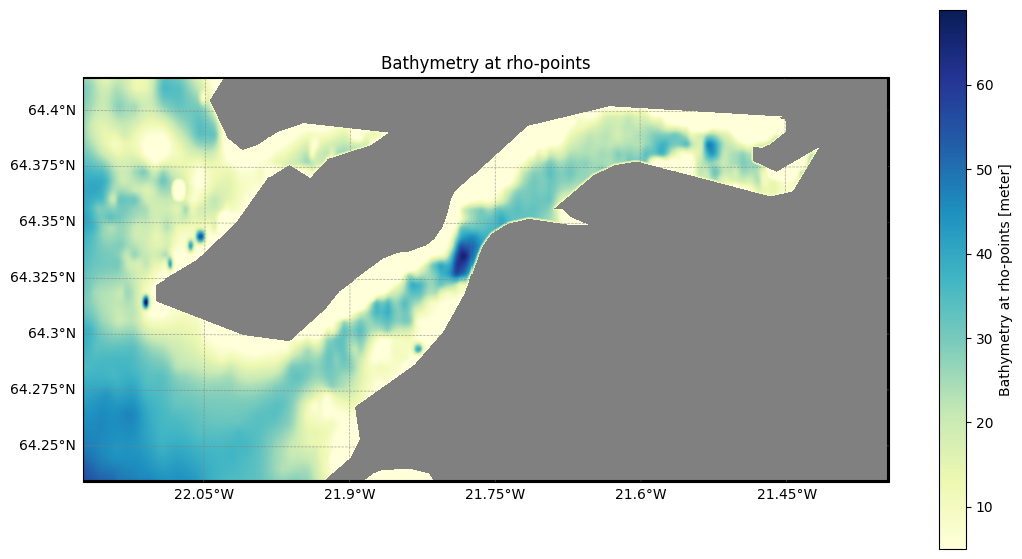

In [19]:
fjord_grid_natural_earth.plot()

Next, we explore the **high-resolution (h)** version of the GSHHG dataset to generate the land–sea mask.

In [20]:
%%time
%%memit

fjord_grid_gshhg_h = Grid(
    **iceland_fjord_kwargs, 
    mask_shapefile="/global/cfs/projectdirs/m4746/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/h/GSHHS_h_L1.shp", 
    verbose=True
)

2025-11-24 08:31:28 - INFO - === Creating the horizontal grid ===
2025-11-24 08:31:28 - INFO - Total time: 0.445 seconds
2025-11-24 08:31:28 - INFO - ================================================================================================
2025-11-24 08:31:28 - INFO - === Deriving the mask from coastlines ===
2025-11-24 08:31:45 - INFO - Total time: 16.957 seconds
2025-11-24 08:31:45 - INFO - ================================================================================================
2025-11-24 08:31:45 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2025-11-24 08:31:45 - INFO - Reading the topography data: 0.042 seconds
2025-11-24 08:31:45 - INFO - Regridding the topography: 0.013 seconds
2025-11-24 08:31:45 - INFO - Domain-wide topography smoothing: 0.037 seconds
2025-11-24 08:31:46 - INFO - Local topography smoothing: 0.474 seconds
2025-11-24 08:31:46 - INFO - Total time: 0.597 seconds
2025-11-24 08:31:46 - INFO - =======================

peak memory: 45237.59 MiB, increment: 44612.95 MiB
CPU times: user 13.2 s, sys: 3.07 s, total: 16.3 s
Wall time: 18.3 s


Creating the mask now took about 15 seconds, and the overall memory footprint of the grid increased to roughly 45 GB: relatively high. The coastlines are better resolved than with Natural Earth, though still somewhat angular due to the data reduction applied in this GSHHG resolution.

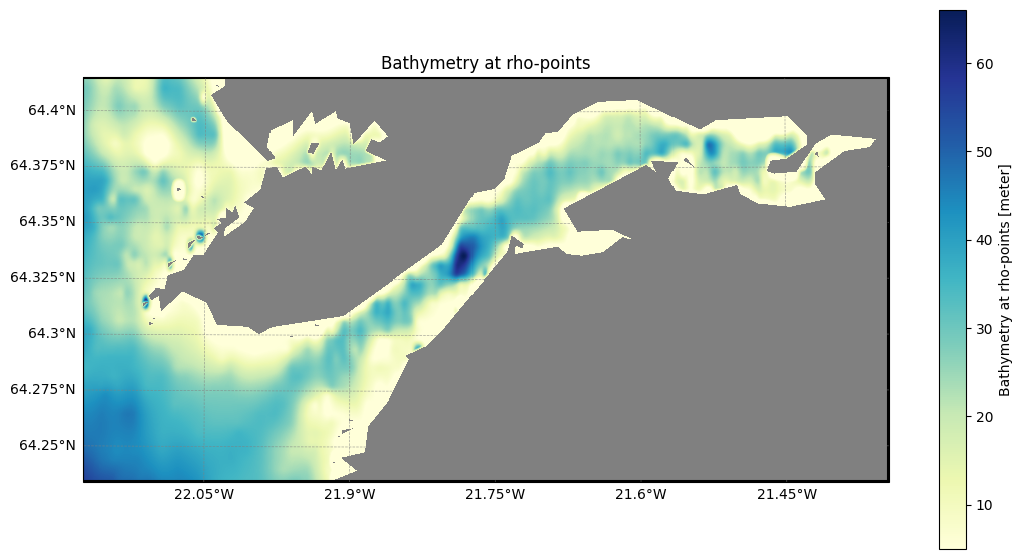

In [21]:
fjord_grid_gshhg_h.plot()

Finally, we use the **full-resolution** GSHHG dataset to generate the land–sea mask.

In [22]:
%%time
%%memit

fjord_grid_gshhg_f = Grid(
    **iceland_fjord_kwargs, 
    mask_shapefile="/global/cfs/projectdirs/m4746/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp", 
    verbose=True
)

2025-11-24 08:31:47 - INFO - === Creating the horizontal grid ===
2025-11-24 08:31:47 - INFO - Total time: 0.463 seconds
2025-11-24 08:31:47 - INFO - ================================================================================================
2025-11-24 08:31:47 - INFO - === Deriving the mask from coastlines ===
2025-11-24 08:32:11 - INFO - Total time: 23.908 seconds
2025-11-24 08:32:11 - INFO - ================================================================================================
2025-11-24 08:32:11 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2025-11-24 08:32:11 - INFO - Reading the topography data: 0.031 seconds
2025-11-24 08:32:11 - INFO - Regridding the topography: 0.017 seconds
2025-11-24 08:32:11 - INFO - Domain-wide topography smoothing: 0.036 seconds
2025-11-24 08:32:12 - INFO - Local topography smoothing: 0.537 seconds
2025-11-24 08:32:12 - INFO - Total time: 0.640 seconds
2025-11-24 08:32:12 - INFO - =======================

peak memory: 56310.67 MiB, increment: 55644.49 MiB
CPU times: user 16.7 s, sys: 4.92 s, total: 21.6 s
Wall time: 25.3 s


Creating the mask now took about 20 seconds, and the grid’s memory footprint increased to roughly 55 GB: even higher. However, the coastline is captured in much greater detail using the full-resolution GSHHG data.

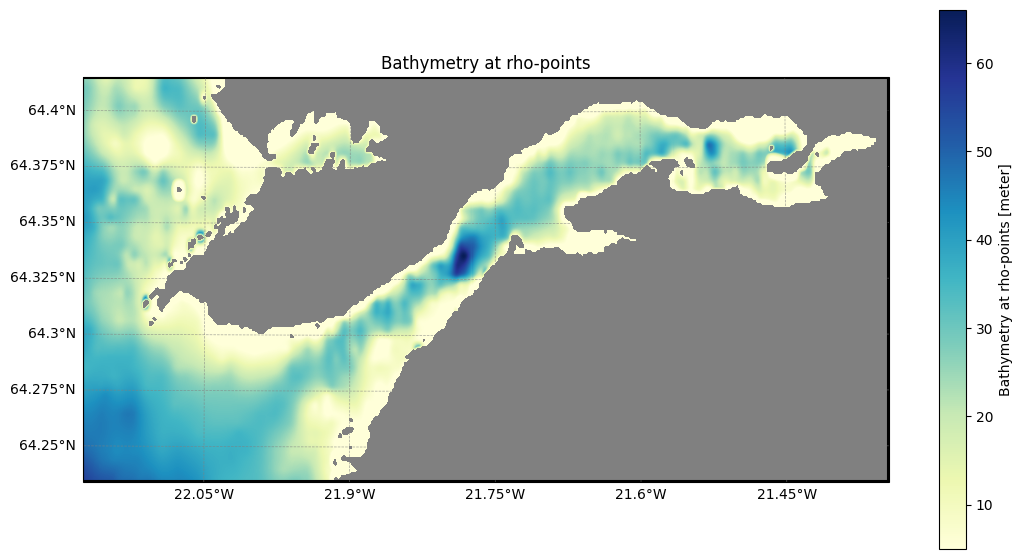

In [23]:
fjord_grid_gshhg_f.plot()

<div class="alert alert-info">

Note

For very large grids with many points, using the full-resolution GSHHG dataset may exceed available memory. You may need to experiment to find the optimal coastline resolution. For most applications, the Natural Earth coastlines may provide a sufficiently accurate representation.
</div>

### Updating the mask

If you want to update the land–sea mask while keeping the existing horizontal grid, topography, and vertical coordinate system, you can skip Steps I, III, and IV. This can be easily done using the `.update_mask` method. 

Here, we update the grid created at the beginning of this notebook (using the Natural Earth coastlines) with a mask derived from the GSHHG dataset.

In [24]:
%%time
%%memit

grid.update_mask(
    mask_shapefile="/global/cfs/projectdirs/m4746/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp",
    verbose=True
)

2025-11-24 08:32:13 - INFO - === Deriving the mask from coastlines ===
2025-11-24 08:32:20 - INFO - Total time: 7.073 seconds
2025-11-24 08:32:20 - INFO - ================================================================================================


peak memory: 11936.83 MiB, increment: 11114.30 MiB
CPU times: user 3.49 s, sys: 1.34 s, total: 4.82 s
Wall time: 7.35 s


The new shapefile is now also recorded in the grid attributes.

In [25]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, mask_shapefile='/global/cfs/projectdirs/m4746/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp', hmin=5.0, verbose=True, straddle=True)

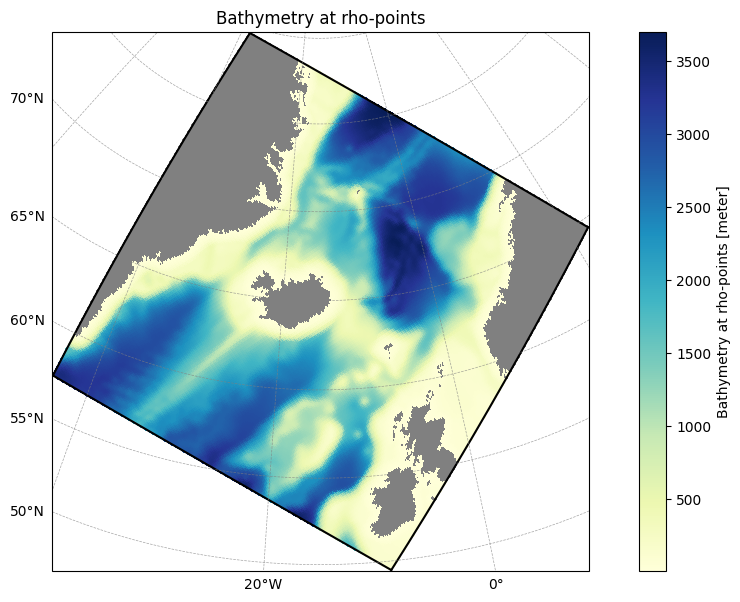

In [26]:
grid.plot()

Let's save a copy of the mask before updating the grid again to switch back to the Natural Earth–derived mask.

In [27]:
nordic_mask_gshhg = grid.ds.mask_rho.copy()

We now switch back to the Natural Earth–derived mask.

In [28]:
grid.update_mask(
    verbose=True
)

2025-11-24 08:32:21 - INFO - === Deriving the mask from coastlines ===
2025-11-24 08:32:21 - INFO - Total time: 0.182 seconds
2025-11-24 08:32:21 - INFO - ================================================================================================


In [29]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [30]:
nordic_mask_natural_earth = grid.ds.mask_rho.copy()

The next plot shows the difference between the two masks.

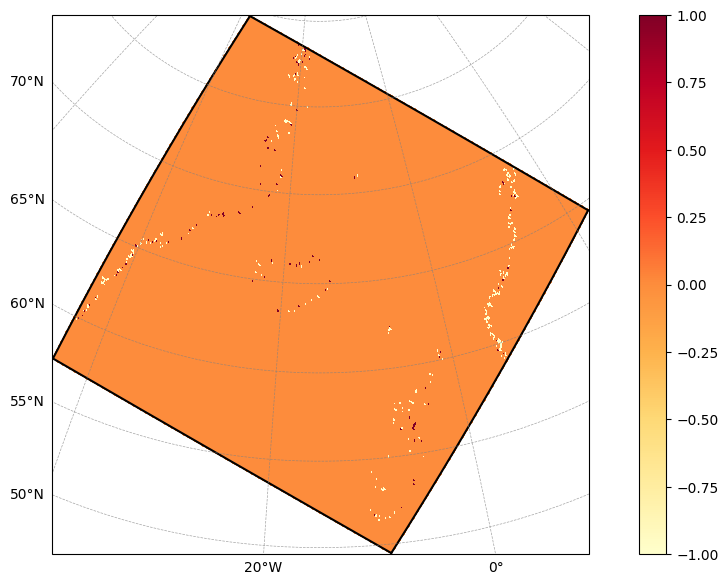

In [31]:
from roms_tools.plot import plot
plot(nordic_mask_gshhg - nordic_mask_natural_earth, grid_ds=grid.ds, apply_mask=False)

The red and yellow dots along the coastline show where the two coastline datasets produce different land-sea masks.

## Topography

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#topography-and-mask) you can find an overview of the steps involved in the topography generation. In the following, we will illustrate how these concepts work in practice.

### Topography source data

The grid object includes a parameter called `topography_source`. If this parameter is not specified, it defaults to using the ETOPO5 topography data. The ETOPO5 data is downloaded internally, so the user does not need to provide a filename. 

The ETOPO5 data has a horizontal resolution of 5 arc-minutes (or 1/12th of a degree). This horizontal resolution may be sufficient for coarser-resolution grids, but for finer-resolution grids we might want to use the finer-resolution topography product SRTM15. SRTM15 has a horizontal resolution of 15 arc-seconds (or 1/240th of a degree). 

Let's compare the topographies that are generated from ETOPO5 versus SRTM15 data for a ROMS grid surrounding Iceland.

In [26]:
iceland_kwargs = {
    "size_x": 800,
    "size_y": 800,
    "center_lon": -19,
    "center_lat": 65,
    "rot": 20,
}

First, we generate two "coarse-resolution" grids with a horizontal resolution of 800km/100 = 8km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [27]:
%%time

coarse_grid_ETOPO5 = Grid(nx=100, ny=100, **iceland_kwargs, verbose=False)

CPU times: user 1.23 s, sys: 8.31 ms, total: 1.24 s
Wall time: 1.35 s


In [28]:
%%time

coarse_grid_SRTM15 = Grid(
    nx=100,
    ny=100,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=False
)

CPU times: user 1.42 s, sys: 89.3 ms, total: 1.51 s
Wall time: 1.79 s


Comparing the timings above, we can see that generating the topographies took a similar amount of time and was quick overall. Next, let’s compare the generated topography fields.

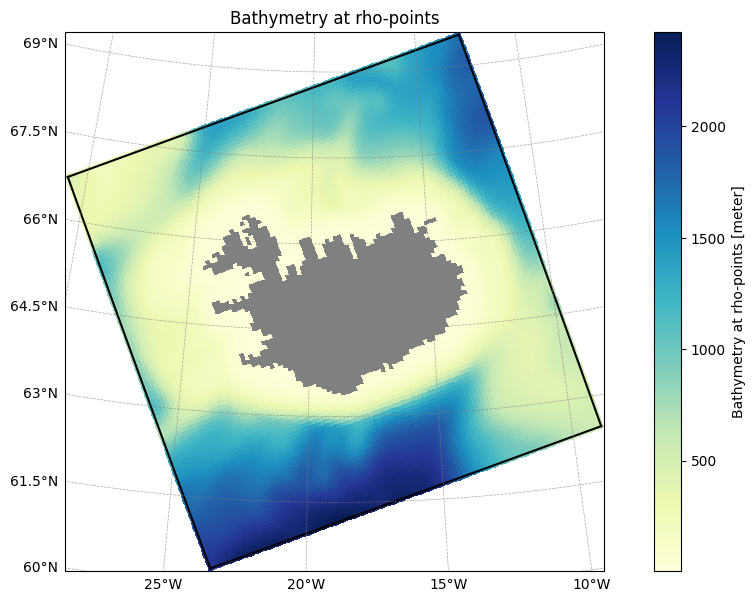

In [29]:
coarse_grid_ETOPO5.plot()

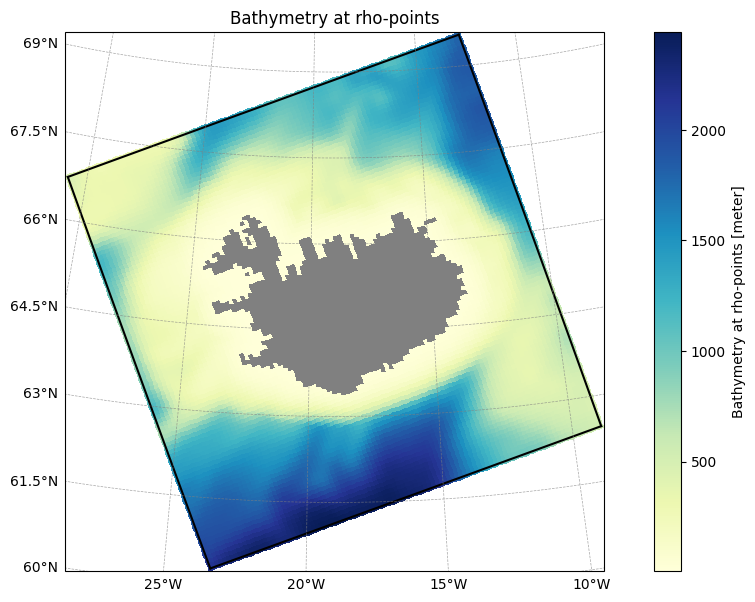

In [30]:
coarse_grid_SRTM15.plot()

Comparing the figures above, we don’t see significant differences in the generated topography fields. The grid is simply too coarse to fully utilize the high-resolution SRTM15 data! To observe more noticeable differences, we need to use a finer resolution grid.

Let's do that! Next, we generate two fine-resolution grids with a horizontal resolution of 800km/5000 = 0.16km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [31]:
%%time

fine_grid = Grid(nx=5000, ny=5000, **iceland_kwargs, verbose=True)

2025-11-14 15:03:39 - INFO - === Creating the horizontal grid ===
2025-11-14 15:04:14 - INFO - Total time: 34.610 seconds
2025-11-14 15:04:14 - INFO - ================================================================================================
2025-11-14 15:04:14 - INFO - === Deriving the mask from coastlines ===
2025-11-14 15:04:45 - INFO - Total time: 31.150 seconds
2025-11-14 15:04:45 - INFO - ================================================================================================
2025-11-14 15:04:46 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2025-11-14 15:04:46 - INFO - Reading the topography data: 0.102 seconds
2025-11-14 15:04:47 - INFO - Regridding the topography: 0.821 seconds
2025-11-14 15:04:51 - INFO - Domain-wide topography smoothing: 4.750 seconds
2025-11-14 15:06:40 - INFO - Local topography smoothing: 108.871 seconds
2025-11-14 15:06:40 - INFO - Total time: 114.664 seconds
2025-11-14 15:06:40 - INFO - ==================

CPU times: user 2min 29s, sys: 31.5 s, total: 3min 1s
Wall time: 3min 1s


In [32]:
%%time

fine_grid_SRTM15 = Grid(
    nx=5000,
    ny=5000,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=True
)

2025-11-14 15:06:40 - INFO - === Creating the horizontal grid ===
2025-11-14 15:07:14 - INFO - Total time: 33.831 seconds
2025-11-14 15:07:14 - INFO - ================================================================================================
2025-11-14 15:07:14 - INFO - === Deriving the mask from coastlines ===
2025-11-14 15:07:45 - INFO - Total time: 30.586 seconds
2025-11-14 15:07:45 - INFO - ================================================================================================
2025-11-14 15:07:45 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2025-11-14 15:07:45 - INFO - Reading the topography data: 0.038 seconds
2025-11-14 15:07:47 - INFO - Regridding the topography: 1.205 seconds
2025-11-14 15:07:52 - INFO - Domain-wide topography smoothing: 5.005 seconds
2025-11-14 15:09:33 - INFO - Local topography smoothing: 101.062 seconds
2025-11-14 15:09:33 - INFO - Total time: 107.839 seconds
2025-11-14 15:09:33 - INFO - ==================

CPU times: user 2min 31s, sys: 21 s, total: 2min 52s
Wall time: 2min 53s


The grid and topography generation process took longer this time, but the durations for both cases were quite similar.

Note that most of the time was spent during the local smoothing phase in both cases. The goal of this smoothing is to ensure that the local steepness ratio does not exceed the threshold of 0.2. Because the topography data contains a lot of details for such a fine-resolution grid, the local smoothing required many iterations for smoothing.

Let's take a look at the generated topography fields.

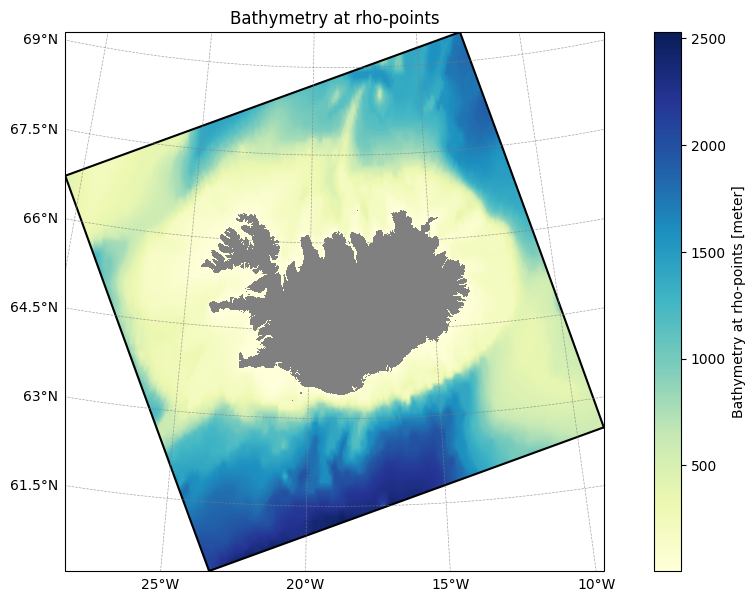

In [33]:
fine_grid.plot()  # grid with ETOPO5 topography

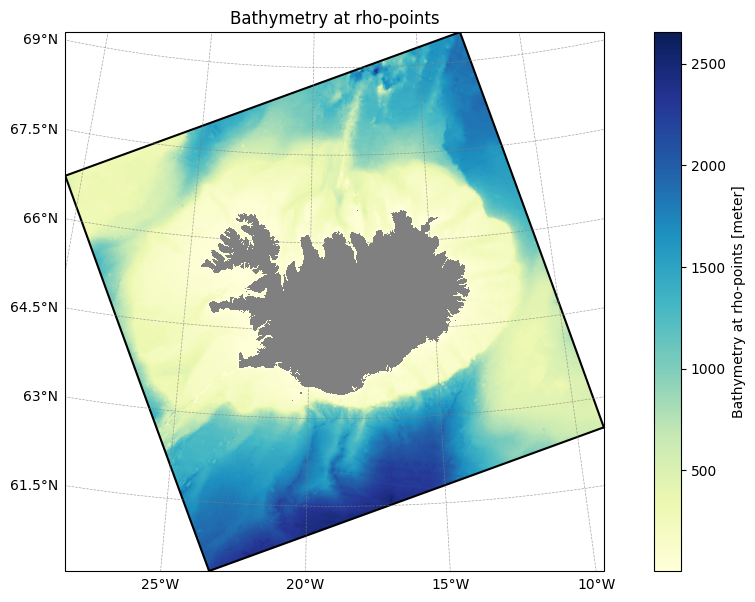

In [34]:
fine_grid_SRTM15.plot()  # grid with SRTM15 topography

The two figures above reveal differences: the topography generated with the SRTM15 data shows a lot more detail. If we moved to an even finer resolution, these differences would become even more pronounced.

### The minimal ocean depth `hmin`

The default for `hmin` is 5 meters. In the above examples, we did not specify the (optional) `hmin` parameter, so it was set to the default value.

In [35]:
fine_grid.hmin

5.0

Let's confirm that the minimum ocean depth is indeed at least 5 meters.

In [36]:
fine_grid.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(5.)

We can define a grid with a different `hmin`.

In [37]:
%%time

fine_grid_with_larger_hmin = Grid(
    nx=5000,
    ny=5000,
    **iceland_kwargs,
    verbose=True,
    hmin=10.0,  # Minimum ocean depth in meters (default: 5.0)
)

2025-11-14 15:10:40 - INFO - === Creating the horizontal grid ===
2025-11-14 15:11:14 - INFO - Total time: 34.903 seconds
2025-11-14 15:11:14 - INFO - ================================================================================================
2025-11-14 15:11:15 - INFO - === Deriving the mask from coastlines ===
2025-11-14 15:11:46 - INFO - Total time: 31.299 seconds
2025-11-14 15:11:46 - INFO - ================================================================================================
2025-11-14 15:11:46 - INFO - === Generating the topography using ETOPO5 data and hmin = 10.0 meters ===
2025-11-14 15:11:47 - INFO - Reading the topography data: 0.100 seconds
2025-11-14 15:11:47 - INFO - Regridding the topography: 0.816 seconds
2025-11-14 15:11:52 - INFO - Domain-wide topography smoothing: 4.782 seconds
2025-11-14 15:13:11 - INFO - Local topography smoothing: 79.159 seconds
2025-11-14 15:13:11 - INFO - Total time: 84.970 seconds
2025-11-14 15:13:11 - INFO - ===================

CPU times: user 2min 10s, sys: 19.2 s, total: 2min 30s
Wall time: 2min 31s


In [38]:
fine_grid_with_larger_hmin.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(10.)

### Updating topography and `hmin`

When working with a grid that has a large number of grid points, such as `nx` = `ny` = 5000 in the example above, Steps I and II (creating the horizontal grid and land mask) can be quite time-consuming: it took about 40 + 30 = 70 seconds! If you simply want to repeat Step III, which involves updating the topography and/or `hmin`, but you would like to keep the same horizontal grid and mask, you can skip Steps I, II, and IV. This can be easily achieved using the `.update_topography` method. In the next cell, we take our fine resolution grid with ETOPO5 topography, and update it with SRTM15 topography and a larger `hmin` of 10 meters.

In [39]:
%%time

fine_grid.update_topography(
    hmin=10.0,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    verbose=True,
)

2025-11-14 15:13:12 - INFO - === Generating the topography using SRTM15 data and hmin = 10.0 meters ===
2025-11-14 15:13:12 - INFO - Reading the topography data: 0.103 seconds
2025-11-14 15:13:14 - INFO - Regridding the topography: 1.265 seconds
2025-11-14 15:13:19 - INFO - Domain-wide topography smoothing: 4.930 seconds
2025-11-14 15:14:21 - INFO - Local topography smoothing: 62.700 seconds
2025-11-14 15:14:21 - INFO - Total time: 69.656 seconds
2025-11-14 15:14:21 - INFO - ================================================================================================


CPU times: user 56.1 s, sys: 11.9 s, total: 1min 8s
Wall time: 1min 9s


From the printed output, you can see that Steps I, II, and IV were skipped as desired. The following confirms that the `topography_source` and `hmin` were indeed updated.

In [40]:
fine_grid

Grid(nx=5000, ny=5000, size_x=800, size_y=800, center_lon=-19, center_lat=65, rot=20, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=10.0, verbose=True, straddle=False)

## The vertical coordinate system

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system) you can find an overview of the steps involved in creating the vertical coordinate system.

To prepare the vertical coordinate system, `ROMS-Tools` needs the following parameters:

* `N`: the number of vertical layers (default: 100)
* `theta_s`: the surface control parameter (default: 5.0)
* `theta_b`: the bottom control parameter (default: 2.0)
* `hc`: the critical depth in meters (default: 300.0)

In the above examples, we did not specify the last three parameters, so they were set to the default values.

In [41]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [42]:
print(f"N: {grid.N}, theta_s: {grid.theta_s}, theta_b: {grid.theta_b}, hc: {grid.hc}")

N: 100, theta_s: 5.0, theta_b: 2.0, hc: 300.0


Among the [steps involved in generating the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system), only the first two are executed during grid generation. 
Specifically, the `grid.ds` object contains the vertical stretched coordinates (`sigma_r` and `sigma_w`), as well as the vertical stretching functions (`Cs_r` and `Cs_w`).

In [43]:
grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.27 57.26 ... 64.56 64.48
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.61 22.7
    lat_u         (eta_rho, xi_u) float64 506kB 57.27 57.26 57.25 ... 64.6 64.52
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 ... 22.56 22.66
    lat_v         (eta_v, xi_rho) float64 506kB 57.31 57.31 57.3 ... 64.54 64.46
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.52 22.61
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.23 57.22 ... 64.46
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.8 316.1 ... 22.84
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05794 -0.05794 ... -1.102
    f             (eta_rho, xi_rho) float64 508kB 0.0001223 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    pn            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.387e+03 3.387e+03 ... 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.1.2.dev23+gc2b82bc5c
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /global/cfs/projectdirs/m4746/Datasets/SRTM15/SR...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

Text(0.5, 1.0, 'Vertical stretching function at rho-points')

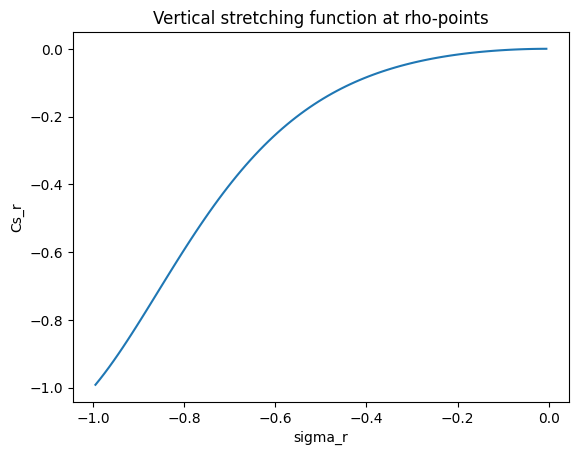

In [44]:
import matplotlib.pyplot as plt

plt.plot(grid.ds.sigma_r, grid.ds.Cs_r)
plt.xlabel("sigma_r")
plt.ylabel("Cs_r")
plt.title("Vertical stretching function at rho-points")

The vertical stretching functions, along with the topography, are used to compute the depth of the layers and interfaces, as described in step 3 of [this list](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system). Since this step can be computationally expensive and memory-intensive for large grids (e.g., `nx` = `ny` = 5000 as in one of the examples above), `ROMS-Tools` does not compute the layer depths and interfaces during grid generation. Instead, they are calculated later, when needed for generating initial conditions or boundary forcing.

However, if you wish to visualize the layer depths during the grid generation, they can be computed and plotted as demonstrated in the next section.

### Plotting the vertical coordinate system

You can visualize the vertical coordinate system from different perspectives using the `.plot_vertical_coordinate` method. Let's begin by examining the depth of the different layers.

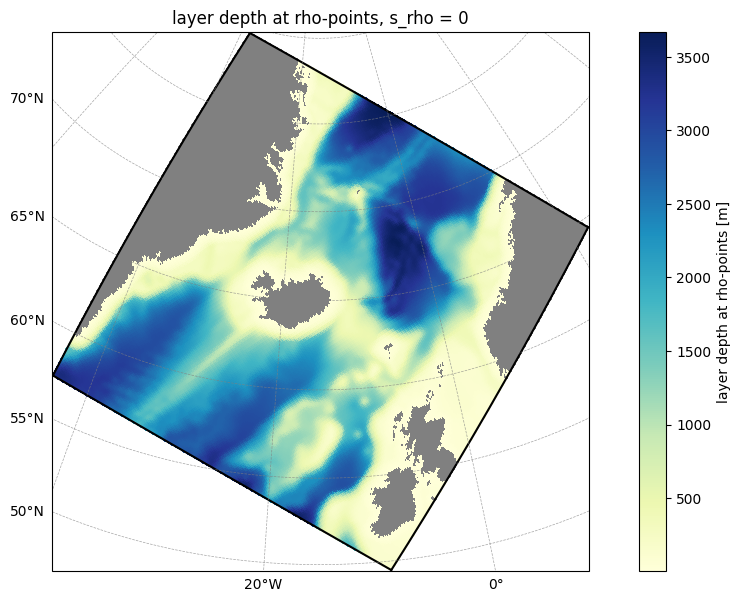

In [45]:
grid.plot_vertical_coordinate(s=0)  # depth of the lowermost layer at rho-points

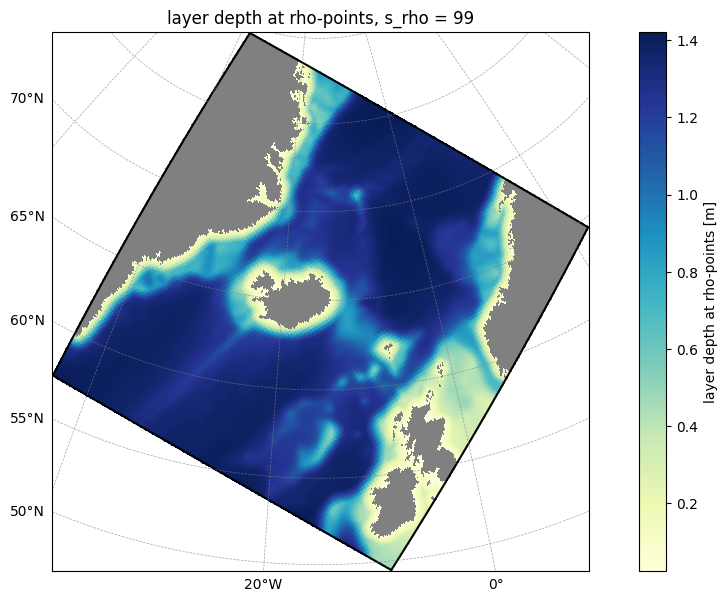

In [46]:
grid.plot_vertical_coordinate(s=-1)  # depth of the uppermost layer at rho-points

We are now interested in a vertical view of our layers. We can look at a transect by slicing through the `eta` or `xi` dimensions.

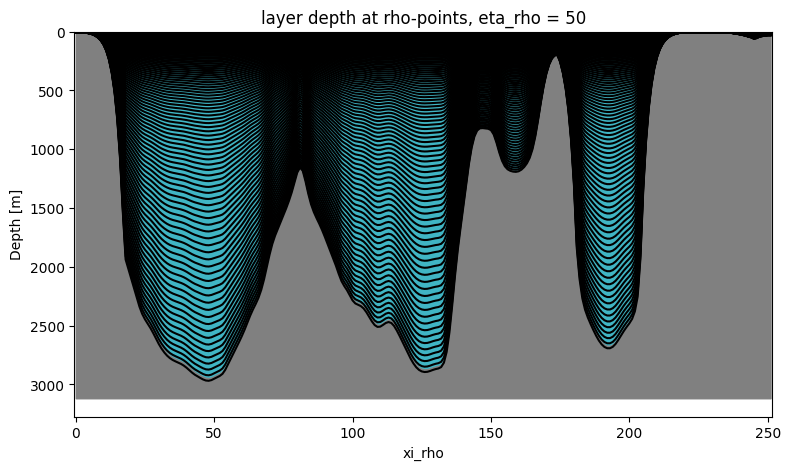

In [47]:
grid.plot_vertical_coordinate(eta=50)

The upper ocean layers are so densely packed that the lines converge and become indistinguishable. 

To address this, we offer an option to limit the number of plotted layers by specifying a maximum.

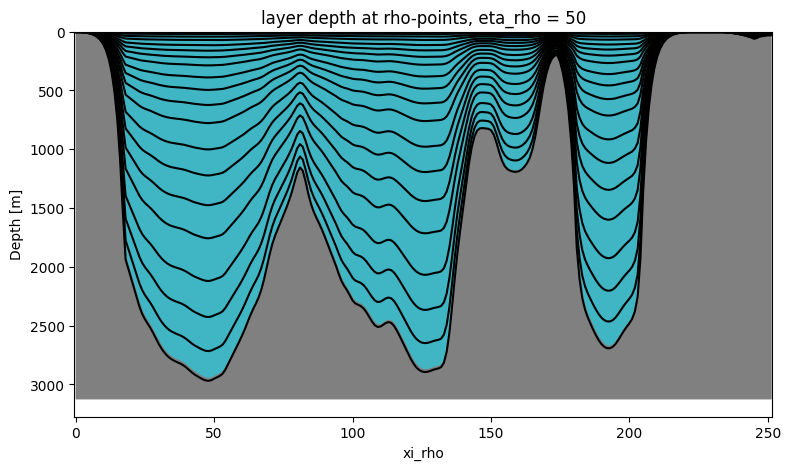

In [48]:
grid.plot_vertical_coordinate(eta=50, max_nr_layer_contours=20)

### Vertical coordinate system parameters

To examine the vertical coordinate system parameters, we begin with a control grid containing just 20 vertical layers—small enough to clearly distinguish variations in the vertical plots.

In [49]:
fixed_grid_parameters = {
    "nx": 100,
    "ny": 100,
    "size_x": 1800,
    "size_y": 2400,
    "center_lon": -21,
    "center_lat": 61,
    "rot": 20,
    "N": 20,
}

In [50]:
control_grid = Grid(
    **fixed_grid_parameters,
    theta_s=5.0,
    theta_b=2.0,
    hc=300.0,
)

In [51]:
control_grid

Grid(nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-21, center_lat=61, rot=20, N=20, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'ETOPO5'}, hmin=5.0, verbose=False, straddle=False)

We will now change the vertical coordinate system parameters `theta_s`, `theta_b`, and `hc`, and see what effect this has.

#### Critical depth

The critical depth `hc` sets the transition between flat $z$-levels in the upper ocean and terrain-following sigma-levels below. Usually we want to choose `hc` to be comparable with the expected depth of the pycnocline. That being said, let's experiment with the `hc` parameter. 

In [52]:
grid_with_large_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=1000.0,
)

grid_with_small_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=50.0,
)

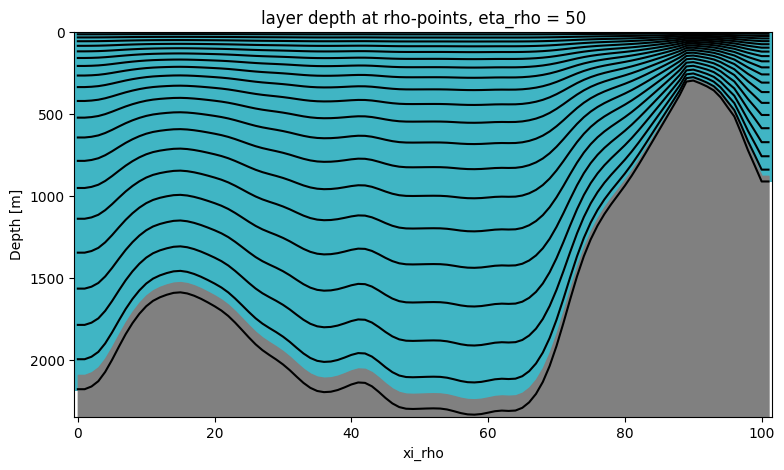

In [53]:
control_grid.plot_vertical_coordinate(eta=50)

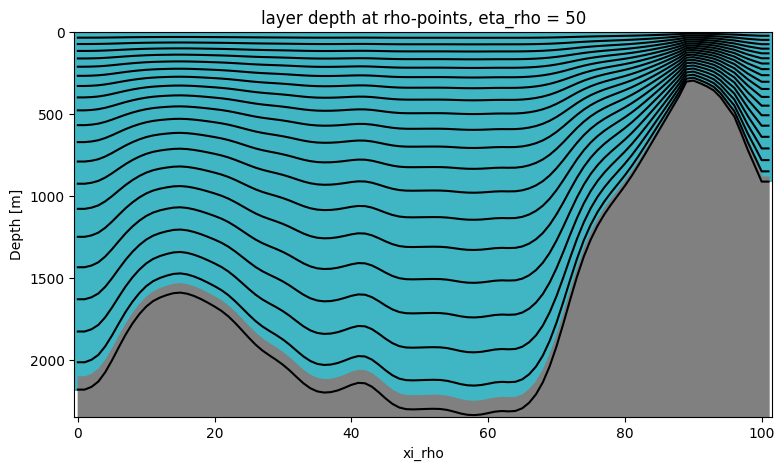

In [54]:
grid_with_large_critical_depth.plot_vertical_coordinate(eta=50)

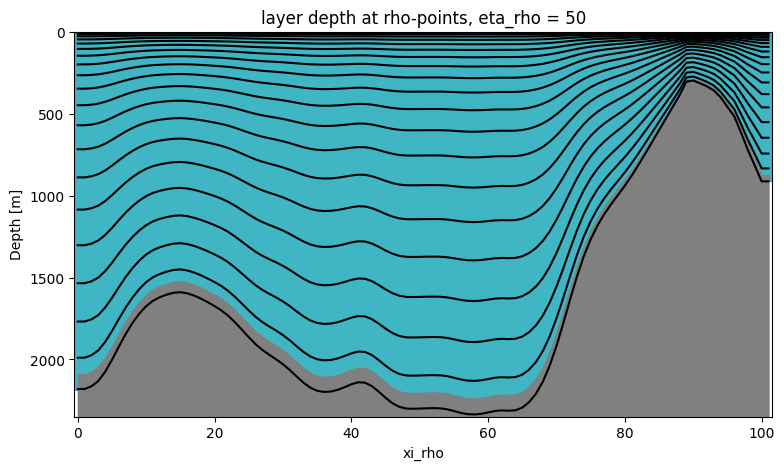

In [55]:
grid_with_small_critical_depth.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we observe that 

* increasing `hc` results in a higher proportion of the upper ocean having nearly evenly spaced levels. It's important to note that despite setting `hc` to 1000m in the second plot, the evenly spaced levels do not extend all the way down to 1000m. However, in deeper ocean regions (visible in the left part of the plot), we approach this depth threshold more closely.
* reducing `hc` leads to a smaller proportion of the upper ocean having nearly evenly spaced levels.

#### Surface and bottom control parameters

The surface control parameter `theta_s` and bottom control parameter `theta_b` determine how much the vertical grid is stretched near the surface and bottom, respectively. Let's change these two parameters and see what happens.

In [56]:
grid_with_large_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=10.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

grid_with_small_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=2.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

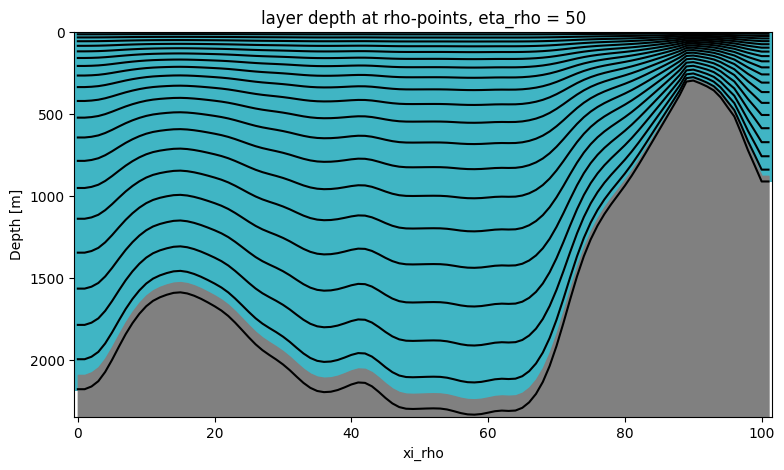

In [57]:
control_grid.plot_vertical_coordinate(eta=50)

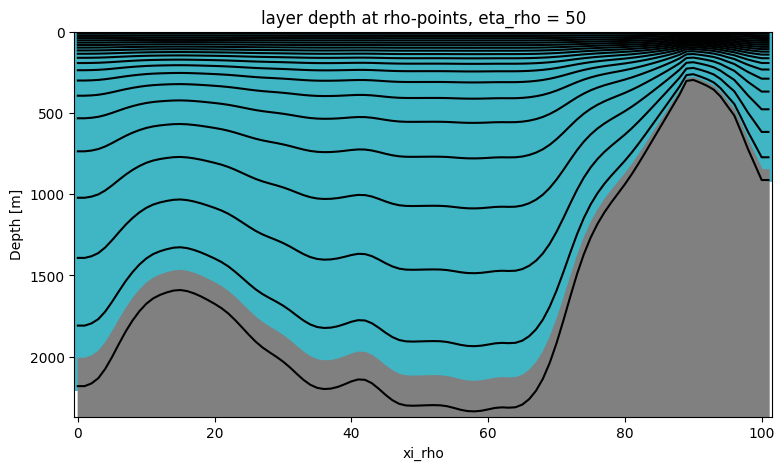

In [58]:
grid_with_large_theta_s.plot_vertical_coordinate(eta=50)

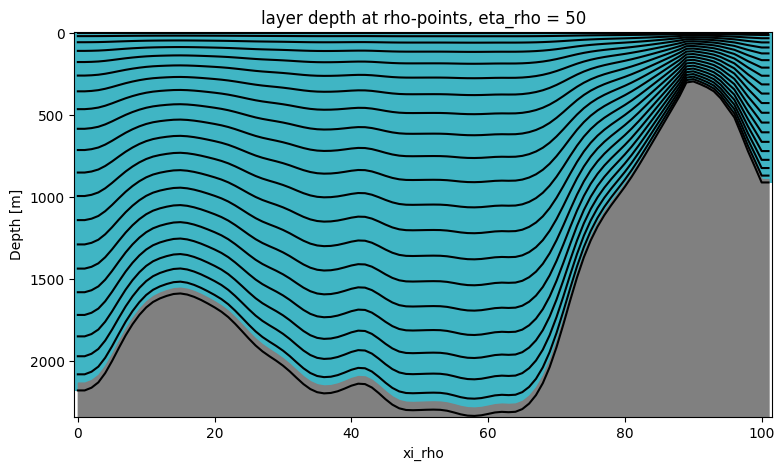

In [59]:
grid_with_small_theta_s.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we can see that 

* increasing `theta_s` leads to a refinement of the vertical grid near the surface,
* reducing `theta_s` leads to coarsening of the vertical grid near the surface.

We can play a similar game with the bottom control parameter `theta_b`.

In [60]:
grid_with_large_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=6.0,
    hc=control_grid.hc
)

grid_with_small_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=0.5,
    hc=control_grid.hc
)

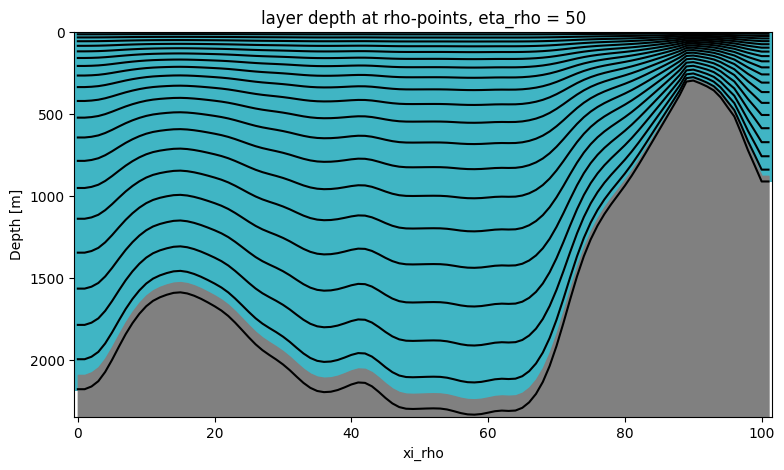

In [61]:
control_grid.plot_vertical_coordinate(eta=50)

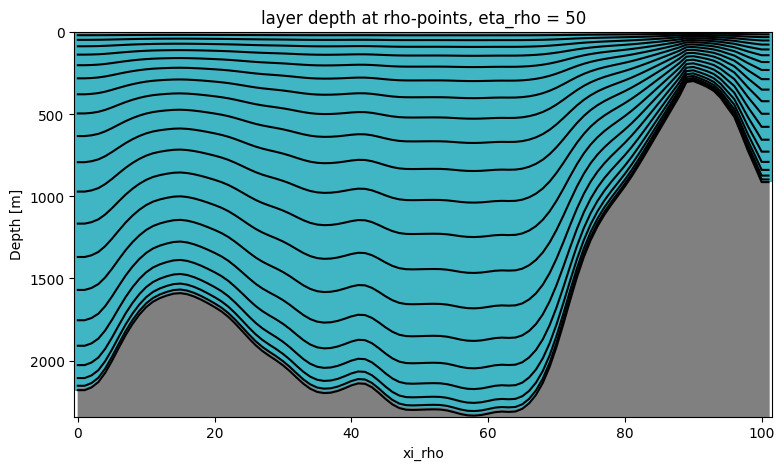

In [62]:
grid_with_large_theta_b.plot_vertical_coordinate(eta=50)

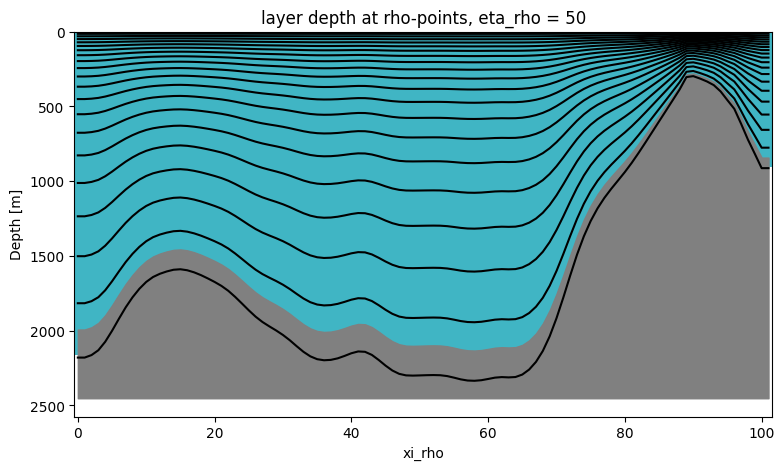

In [63]:
grid_with_small_theta_b.plot_vertical_coordinate(eta=50)

Again, comparing the three plots above, we can see that 

* increasing `theta_b` leads to a refinement of the vertical grid near the bottom,
* reducing `theta_b` leads to coarsening of the vertical grid near the bottom.

### Updating the vertical coordinate system

If you want to update the vertical coordinate system but would like to keep the same horizontal grid, mask and topography, you can skip Steps I, II, and III. 
This can be easily achieved using the `.update_vertical_coordinate` method.  Let's update the grid that we created at the very beginning of this notebook.

In [64]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [65]:
grid.update_vertical_coordinate(N=10, theta_s=1.0, verbose=True)

2025-11-14 15:14:37 - INFO - === Preparing the vertical coordinate system using N = 10, theta_s = 1.0, theta_b = 2.0, hc = 300.0 ===
2025-11-14 15:14:37 - INFO - Total time: 0.004 seconds
2025-11-14 15:14:37 - INFO - ================================================================================================


In the cell above, we regenerated the vertical coordinate system of our original grid, but this time only with 10 layers and `theta_s = 1.0`.

In [66]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=10, theta_s=1.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

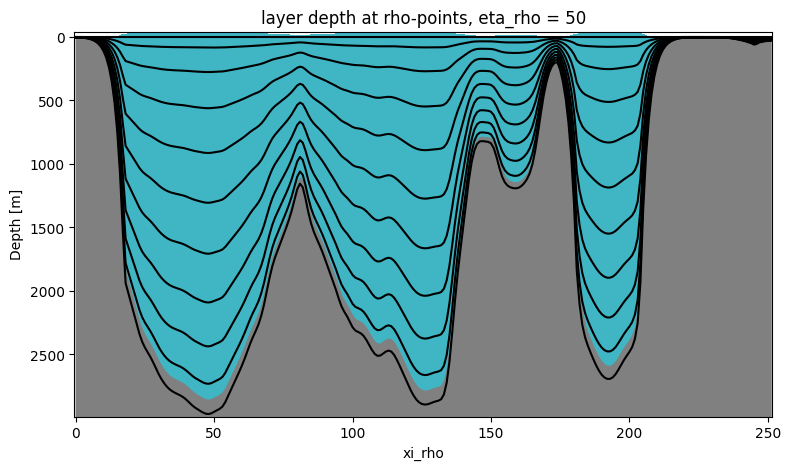

In [67]:
grid.plot_vertical_coordinate(eta=50)